In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score, accuracy_score


In [2]:
file_path = '../Covid Data.csv'
data = pd.read_csv(file_path)
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
data['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [4]:
data.isnull().sum()


USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [5]:
data['PREGNANT'].value_counts()

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [6]:
data['PREGNANT'] = data['PREGNANT'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 3 if (x == 97 or x == 98) else pd.NA)
data['PREGNANT'].value_counts()

PREGNANT
3    527265
0    513179
1      8131
Name: count, dtype: int64

In [7]:
bool_columns = ['PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY',
                'ASTHMA', 'INMSUPR', 'CARDIOVASCULAR', 'RENAL_CHRONIC',
                'TOBACCO', 'INTUBED', 'ICU', 'SEX', 'OTHER_DISEASE', 'PATIENT_TYPE']
for col in bool_columns:
    data[col] = data[col].apply(lambda x: 1 if x == 1 else 0 if x == 2 else pd.NA)

In [8]:
data['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
1    848544
0    200031
Name: count, dtype: int64

In [9]:
data['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'].apply(lambda x: 1 if (x == 1 or x == 2 or x == 3) else 0 if (x == 4 or x == 5 or x == 6 or x == 7) else pd.NA)

In [10]:
data['DEATH']=[1 if date=="9999-99-99" else 0 for date in data['DATE_DIED']]
data.drop('DATE_DIED',axis=1,inplace=True)
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,<NA>,1,65,0,0,2,...,0,1,0,0,0,0,0,1,<NA>,0
1,2,1,0,1,<NA>,1,72,3,0,2,...,0,1,0,0,1,1,0,0,<NA>,0
2,2,1,0,0,1,0,55,3,1,2,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,<NA>,0,53,0,0,2,...,0,0,0,0,0,0,0,0,<NA>,0
4,2,1,0,1,<NA>,0,68,3,1,2,...,0,1,0,0,0,0,0,1,<NA>,0


In [11]:
data['AGE'][(data['AGE']<0) | (data['AGE'] > 120)].sum()

np.int64(121)

In [12]:
data = data.replace({97: np.nan, 99: np.nan})
data = data.dropna()

In [13]:
data['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
1    108255
0     81269
Name: count, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189524 entries, 2 to 1048571
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 189524 non-null  int64  
 1   MEDICAL_UNIT          189524 non-null  int64  
 2   SEX                   189524 non-null  int64  
 3   PATIENT_TYPE          189524 non-null  int64  
 4   INTUBED               189524 non-null  object 
 5   PNEUMONIA             189524 non-null  object 
 6   AGE                   189524 non-null  float64
 7   PREGNANT              189524 non-null  int64  
 8   DIABETES              189524 non-null  object 
 9   COPD                  189524 non-null  int64  
 10  ASTHMA                189524 non-null  object 
 11  INMSUPR               189524 non-null  object 
 12  HIPERTENSION          189524 non-null  object 
 13  OTHER_DISEASE         189524 non-null  object 
 14  CARDIOVASCULAR        189524 non-null  object 
 15  OBES

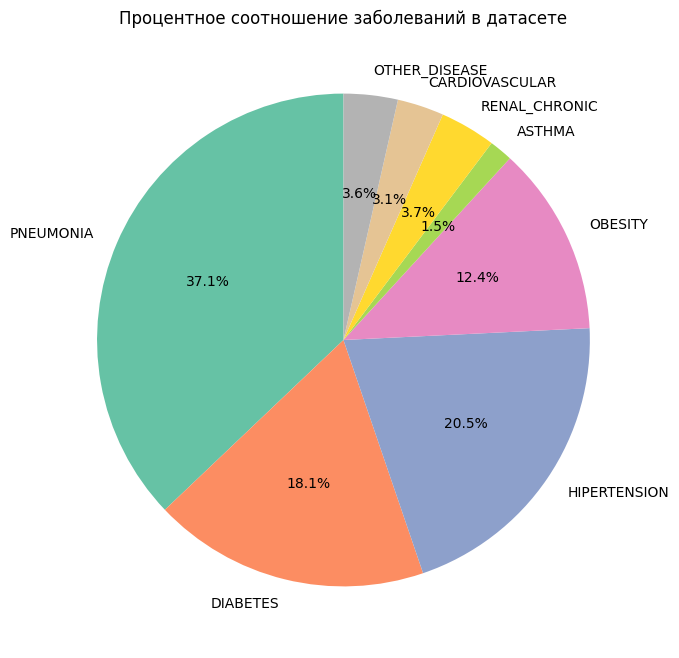

In [15]:
disease_columns = ['PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'ASTHMA', 'RENAL_CHRONIC', 'CARDIOVASCULAR', 'OTHER_DISEASE']
disease_counts = data[disease_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(disease_counts, labels=disease_columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Процентное соотношение заболеваний в датасете')
plt.show()


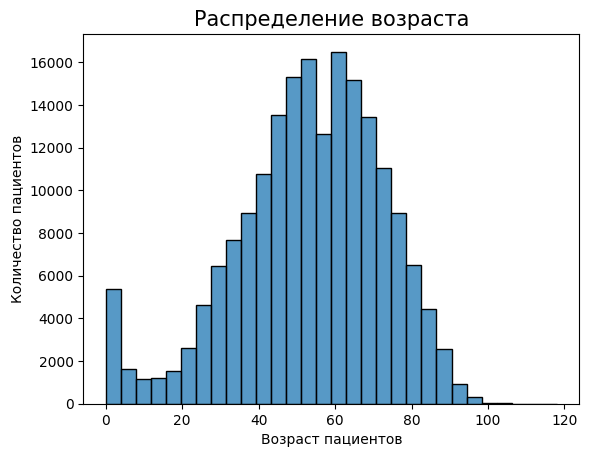

In [16]:
plt.title('Распределение возраста', fontsize=15)
sns.histplot(data=data, x=data['AGE'],bins=30)
plt.ylabel('Количество пациентов')
plt.xlabel('Возраст пациентов')
plt.show()

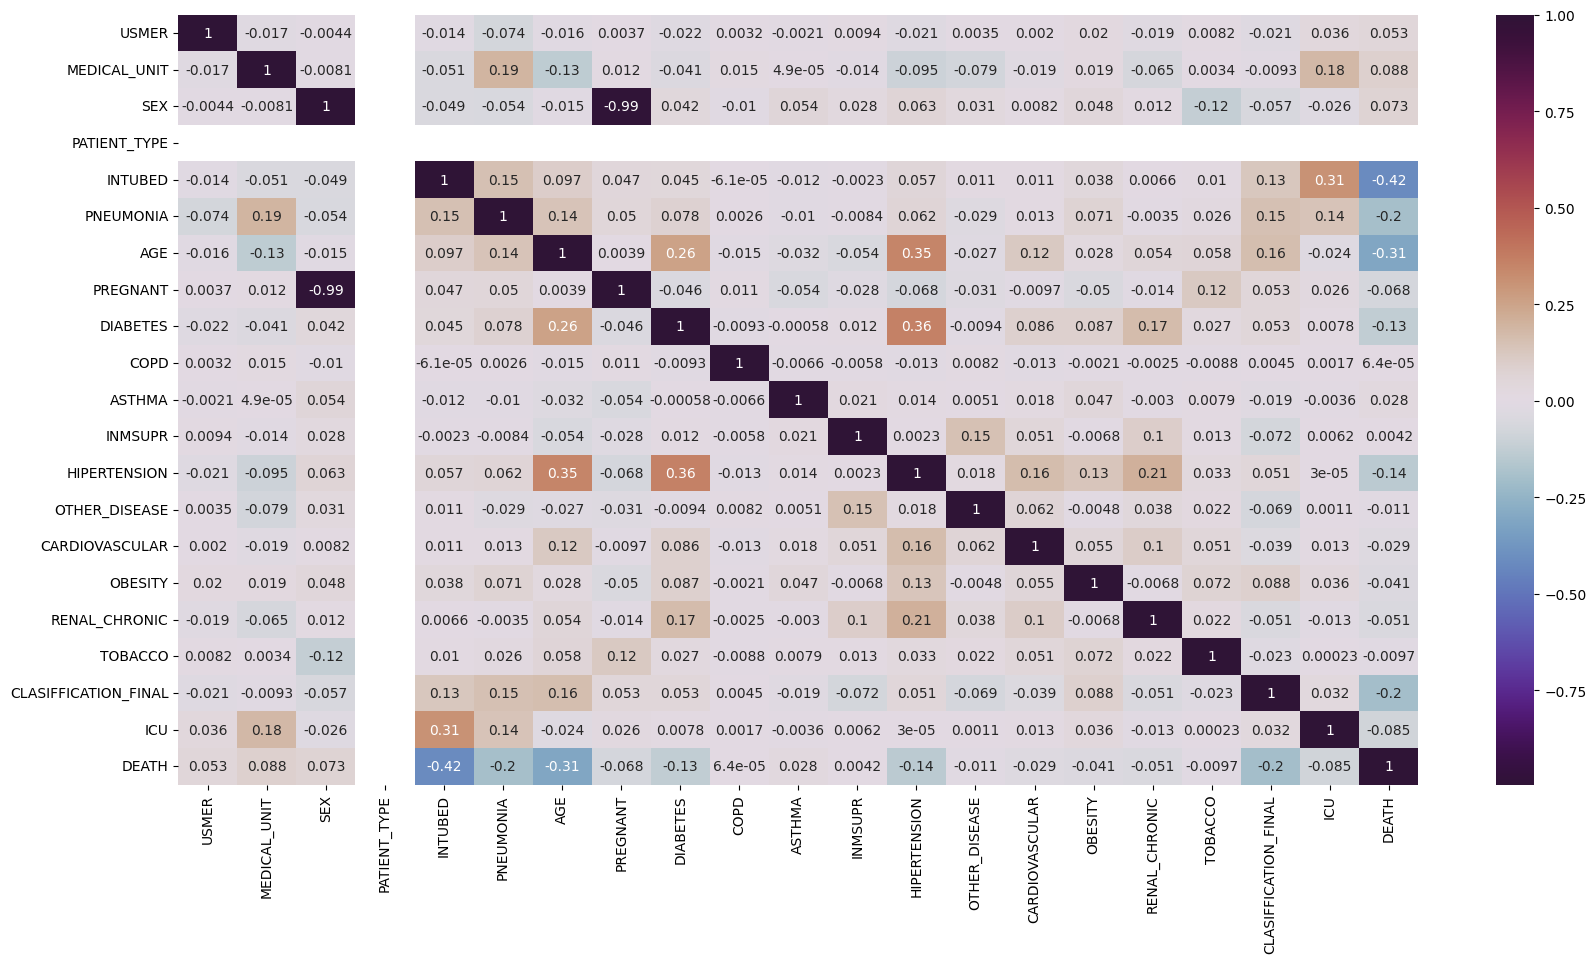

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='twilight_shifted')
plt.show()

In [18]:
target = 'CLASIFFICATION_FINAL'
features = ['PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY',
            'ASTHMA', 'INMSUPR', 'CARDIOVASCULAR',
            'RENAL_CHRONIC', 'TOBACCO', 'USMER', 'INTUBED', 'ICU',
            'SEX', 'PATIENT_TYPE', 'DEATH']

In [19]:

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((151619, 15), (37905, 15), (151619,), (37905,))

In [20]:
clf = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=4)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=4)

In [21]:
y_pred_rf = clf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.42      0.49     16135
           1       0.65      0.78      0.71     21770

    accuracy                           0.63     37905
   macro avg       0.62      0.60      0.60     37905
weighted avg       0.62      0.63      0.62     37905



In [22]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [23]:
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gbc))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.41      0.48     16135
           1       0.64      0.79      0.71     21770

    accuracy                           0.63     37905
   macro avg       0.62      0.60      0.59     37905
weighted avg       0.62      0.63      0.61     37905



In [24]:
log_reg = LogisticRegression(max_iter=10000, random_state=42, C=10, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000, random_state=42, solver='liblinear')

In [25]:
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49     16135
           1       0.64      0.76      0.70     21770

    accuracy                           0.62     37905
   macro avg       0.61      0.60      0.59     37905
weighted avg       0.61      0.62      0.61     37905



In [26]:
importances = clf.feature_importances_
feature_names = X.columns

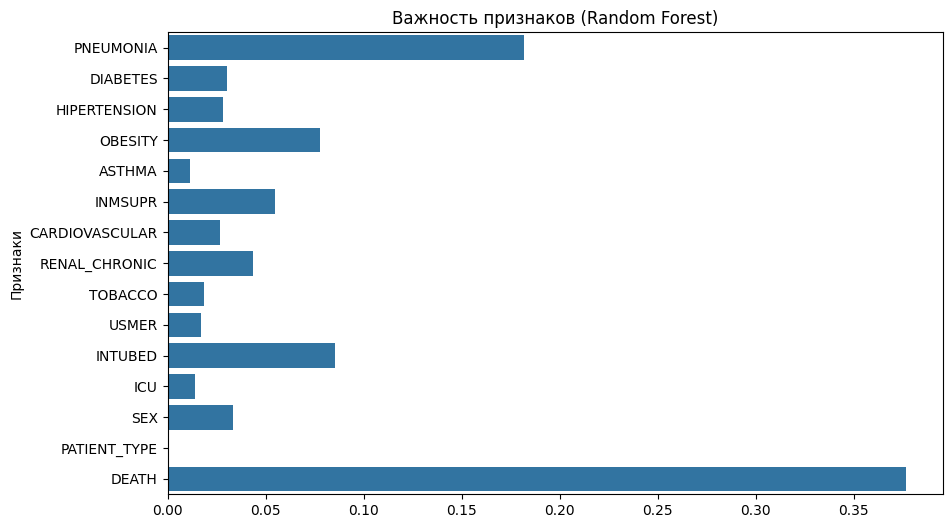

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Важность признаков (Random Forest)')
plt.ylabel('Признаки')
plt.show()


In [28]:
importances = gbc.feature_importances_
feature_names = X.columns

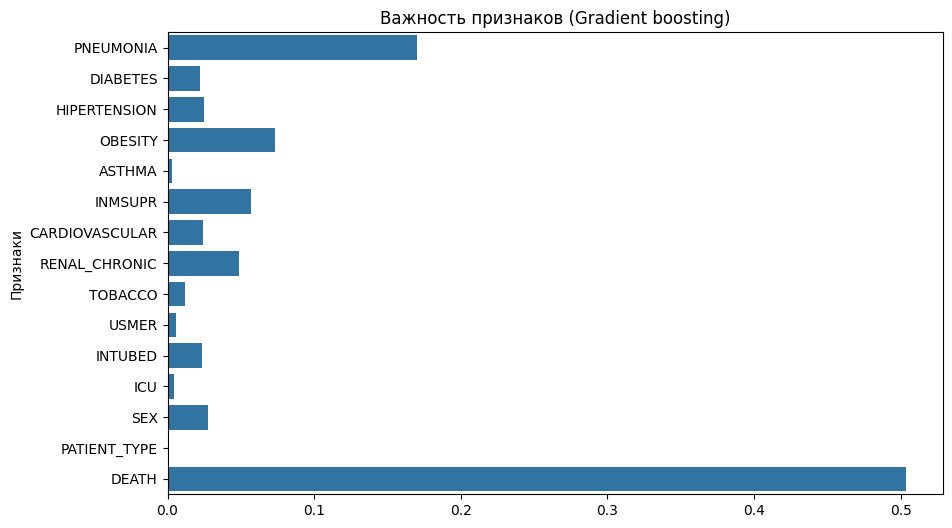

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Важность признаков (Gradient boosting)')
plt.ylabel('Признаки')
plt.show()

Матрица ошибок (Random Forest):
 [[ 6810  9325]
 [ 4764 17006]]


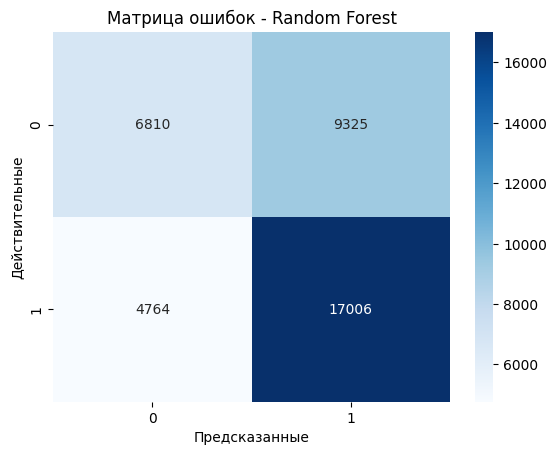

In [30]:
print("Матрица ошибок (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок - Random Forest')
plt.xlabel('Предсказанные')
plt.ylabel('Действительные')
plt.show()

Матрица ошибок (Gradient Boosting):
 [[ 6561  9574]
 [ 4593 17177]]


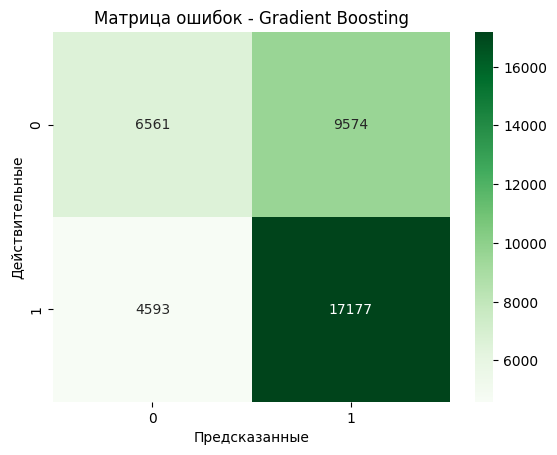

In [31]:
print("Матрица ошибок (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gbc))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot=True, fmt='d', cmap='Greens')
plt.title('Матрица ошибок - Gradient Boosting')
plt.xlabel('Предсказанные')
plt.ylabel('Действительные')
plt.show()

Матрица ошибок (Logistic Regression):
 [[ 6894  9241]
 [ 5124 16646]]


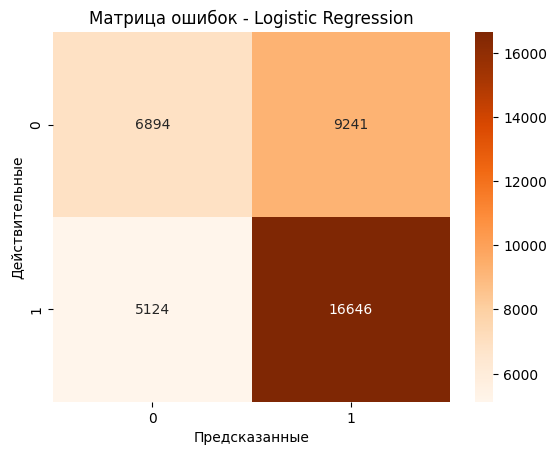

In [32]:
print("Матрица ошибок (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Oranges')
plt.title('Матрица ошибок - Logistic Regression')
plt.xlabel('Предсказанные')
plt.ylabel('Действительные')
plt.show()

In [33]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Gradient Boosting Accuracy:", accuracy_gbc)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Random Forest Accuracy: 0.6283076111330959
Gradient Boosting Accuracy: 0.626249835114101
Logistic Regression Accuracy: 0.6210262498351141


In [34]:
print("Random Forest R^2 Score:", r2_score(y_test, clf.predict(X_test)))

print("Gradient Boosting R^2 Score:", r2_score(y_test, gbc.predict(X_test)))

print("Logistic Regression R^2 Score:", r2_score(y_test, log_reg.predict(X_test)))

Random Forest R^2 Score: -0.5203699293640776
Gradient Boosting R^2 Score: -0.5287870529704655
Logistic Regression R^2 Score: -0.5501535975097576


In [35]:
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

print("Gradient Boosting F1 Score:", f1_score(y_test, y_pred_gbc, average='weighted'))

print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

Random Forest F1 Score: 0.6153388464748697
Gradient Boosting F1 Score: 0.6113239023739078
Logistic Regression F1 Score: 0.6096857470774754


In [36]:
rf_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Mean Accuracy: {rf_scores.mean():.2f} ± {rf_scores.std():.2f}")

gbc_scores = cross_val_score(gbc, X, y, cv=5, scoring='accuracy')
print(f"Gradient Boosting Mean Accuracy: {gbc_scores.mean():.2f} ± {gbc_scores.std():.2f}")

lr_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print(f"Logistic Regression Mean Accuracy: {lr_scores.mean():.2f} ± {lr_scores.std():.2f}")


Random Forest Mean Accuracy: 0.60 ± 0.03
Gradient Boosting Mean Accuracy: 0.60 ± 0.03
Logistic Regression Mean Accuracy: 0.61 ± 0.02
